In [1]:
suppressPackageStartupMessages({
    library(Seurat)
    library(celldex)
    library(ShinyCell)
    library(dplyr)
    library(SingleR)
    library(dplyr)
})

In [3]:
result <- ReadMtx(
  mtx = "data/EoE.mtx",
  cells = "data/EoE_cell.tsv",
  features = "data/EoE_gene.tsv",
  feature.column = 1
)

In [20]:
metadata <- read.csv("data/EoE_meta.csv")
head(metadata)

In [22]:
obj <- CreateSeuratObject(
  counts = result,
  meta.data = metadata,
  assay = "RNA",
  min.cells = 3,
  min.features = 300
)

In [24]:
obj[["percent.mt"]] <- PercentageFeatureSet(object = obj, pattern = "^MT-")
obj
save(obj, file = file.path("objects", "01.rda"))

An object of class Seurat 
28537 features across 367822 samples within 1 assay 
Active assay: RNA (28537 features, 0 variable features)
 1 layer present: counts

In [25]:
obj <- SCTransform(obj, ncells = 3000,  variable.features.n = 2000, vst.flavor="v2", method = 'glmGamPoi', conserve.memory = TRUE)
save(obj, file=file.path("objects", "02.rda"))

Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 27672 by 367822

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3000 cells

Found 173 outliers - those will be ignored in fitting/regularization step


Skip calculation of full residual matrix

Will not return corrected UMI because residual type is not set to 'pearson'

Calculating gene attributes

Wall clock passed: Time difference of 54.51258 secs

Setting min_variance based on median UMI:  0.04

Calculating variance for residuals of type pearson for 27672 genes

Determine variable features

Setting min_variance based on median UMI:  0.16

Calculating residuals of type pearson for 2000 genes



  |======================================================================| 100%


Computing corrected UMI count matrix

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1

In [26]:
obj <- RunPCA(obj, npcs = 30, verbose = TRUE)
obj <- RunUMAP(obj, reduction = "pca", dims = 1:20)
obj <- FindNeighbors(obj, reduction = "pca", dims = 1:20)
obj <- FindClusters(obj, resolution = 0.5)
save(obj, file=file.path("objects", "03.rda"))

PC_ 1 
Positive:  TPSB2, TPSAB1, CPA3, COL3A1, DCN, LUM, COL1A2, COL6A2, HLA-DRA, VIM 
	   CTSG, COL6A1, COL1A1, IGFBP7, HLA-DPA1, MS4A2, PTGDS, SFRP2, HLA-DPB1, CD74 
	   HLA-DRB1, LGALS1, HPGDS, APOD, SRGN, A2M, SPARC, COL6A3, CCL5, FCER1G 
Negative:  CRCT1, SPRR3, CNFN, SPRR2D, MAL, FAM25A, SPRR2A, ECM1, MT1G, FLG 
	   CRNN, S100A9, KRT78, LYPD2, SPINK7, SPINK5, EMP1, SPRR2E, FTH1, S100P 
	   S100A8, TMPRSS11B, PSCA, SPRR1B, MUC21, LCN2, C15orf48, CSTB, CRISP3, MT1H 
PC_ 2 
Positive:  COL3A1, DCN, LUM, COL1A2, COL6A2, COL1A1, COL6A1, SFRP2, PTGDS, APOD 
	   COL6A3, COL6A5, C1S, MFAP4, CCL11, IGFBP7, SPARC, RARRES2, MMP2, COL12A1 
	   CTSK, ABCA8, FBLN1, RGS5, COL5A2, POSTN, COL5A1, A2M, PDGFRA, SPARCL1 
Negative:  TPSB2, TPSAB1, CPA3, CTSG, MS4A2, HPGDS, FCER1G, HLA-DRA, SRGN, SLC18A2 
	   HLA-DPA1, KRT1, SAMSN1, UTS2, LTC4S, HLA-DPB1, CLU, GATA2, LYZ, TYROBP 
	   CCL4, HLA-DRB1, VWA5A, HLA-DQA1, ALOX5AP, RGS1, CD74, C1orf186, CCL5, KIT 
PC_ 3 
Positive:  TPSB2, TPSAB1, CPA3, CTSG, 

In [2]:
load(file = "objects/03.rda")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



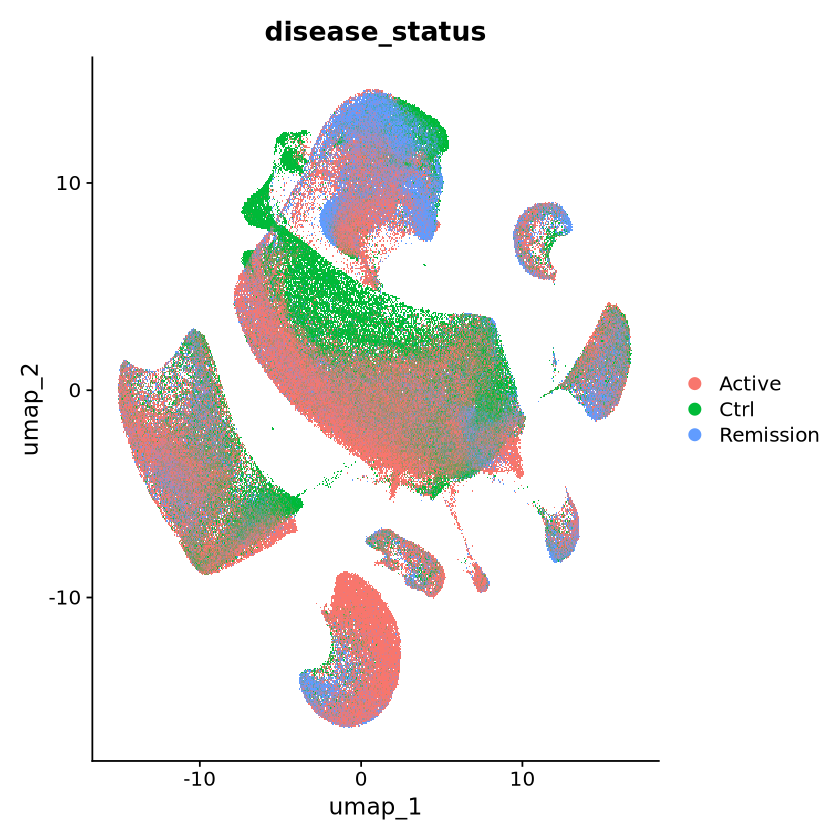

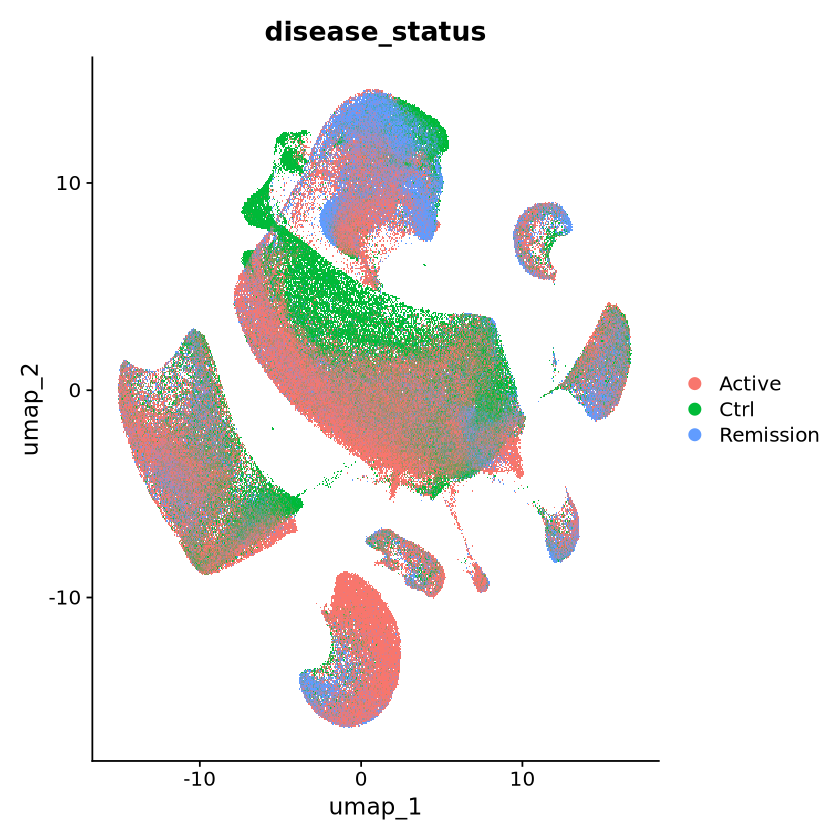

In [3]:
DimPlot(obj, group.by = "disease_status")
DimPlot(obj, group.by = "disease_status")

In [4]:
# Load annotation
monaco.ref <- celldex::MonacoImmuneData()
blueprint.ref <- celldex::BlueprintEncodeData()

see ?celldex and browseVignettes('celldex') for documentation

loading from cache

see ?celldex and browseVignettes('celldex') for documentation

loading from cache

see ?celldex and browseVignettes('celldex') for documentation

loading from cache

see ?celldex and browseVignettes('celldex') for documentation

loading from cache



In [7]:
# Blueprint annnotation
sce <- LayerData(obj)
blueprint.main <- SingleR(test = sce, assay.type.test = 1, ref = blueprint.ref, labels = blueprint.ref$label.main)
obj@meta.data$blueprint.main <- blueprint.main$pruned.labels
save(obj, file=file.path("objects", "04.rda"))

In [8]:
# View blueprint table
sort(table(obj@meta.data$blueprint.main))


          Neurons       Neutrophils         Pericytes   Mesangial cells 
                1                 1                 7                13 
      Melanocytes     Smooth muscle      Chondrocytes   Skeletal muscle 
               14                14                15                19 
       Astrocytes       Eosinophils          Myocytes                DC 
               34                57               341               494 
     Erythrocytes           B-cells       Macrophages          NK cells 
             1465              1627              3028              3189 
       Adipocytes         Monocytes       Fibroblasts Endothelial cells 
             4816              7908              9332             12658 
     CD4+ T-cells               HSC     Keratinocytes      CD8+ T-cells 
            14433             21741             49055             54439 
 Epithelial cells 
           182735 

In [9]:
remove_low_count_cells <- function(seurat_obj, metadata_column, threshold = 20) {

  seurat_obj <- SetIdent(seurat_obj, value = metadata_column)

  total_counts <- table(seurat_obj@meta.data[[metadata_column]])

  low_count_cells <- names(total_counts[total_counts < threshold])

  seurat_obj <- subset(seurat_obj, idents = low_count_cells, invert = TRUE)

  return(seurat_obj)
}
obj <- remove_low_count_cells(seurat_obj = obj, metadata_column = "blueprint.main", threshold = 20)

In [18]:
# View blueprint table
sort(table(obj@meta.data$blueprint.main))


      Eosinophils                DC           B-cells       Macrophages 
               57               494              1627              3028 
         NK cells        Adipocytes         Monocytes       Fibroblasts 
             3189              4816              7908              9332 
Endothelial cells      CD4+ T-cells     Keratinocytes      CD8+ T-cells 
            12658             14433             49055             54439 
 Epithelial cells 
           182735 

In [17]:
obj <- SetIdent(obj, value = "blueprint.main")
obj <- subset(obj, idents = c("Astrocytes", "Myocytes", "HSC", "Erythrocytes"), invert = TRUE)

In [11]:
sce <- LayerData(obj)
monaco.fine <- SingleR(test = sce, assay.type.test = 1, ref = monaco.ref, labels = monaco.ref$label.fine)
obj@meta.data$monaco.fine <- monaco.fine$pruned.labels
save(obj, file=file.path('objects', '05.rda'))

In [12]:
sort(table(obj@meta.data$monaco.fine))


  Non-switched memory B cells                 Naive B cells 
                           23                            37 
            Naive CD8 T cells             Naive CD4 T cells 
                           79                           124 
      Switched memory B cells Terminal effector CD4 T cells 
                          458                           652 
    Follicular helper T cells             Exhausted B cells 
                          869                           881 
                    Th2 cells Terminal effector CD8 T cells 
                         1100                          1107 
                    Th1 cells    Central memory CD8 T cells 
                         1681                          1839 
         Natural killer cells                Th1/Th17 cells 
                         2180                          2496 
  Effector memory CD8 T cells                    Th17 cells 
                         2689                          4043 
      Non classical mon

In [13]:
head(obj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,biosample_id,disease,disease__ontology_label,disease_status,donor_id,library_preparation_protocol,library_preparation_protocol__ontology_label,⋯,species,species__ontology_label,cell_type_anno,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.5,seurat_clusters,blueprint.main,monaco.fine
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<fct>,<fct>,<chr>,<chr>
E1881_AAACCTGAGAATCTCC,E1881,3852,994,E1881,MONDO:0005361,eosinophilic esophagitis,Remission,E1881,EFO:0030003,10x 3' transcription profiling,⋯,NCBITaxon:9606,Homo sapiens,Apical cell,8.151610,4175,994,7,7,Epithelial cells,Myeloid dendritic cells
E1881_AAACCTGAGACTGTAA,E1881,8683,1860,E1881,MONDO:0005361,eosinophilic esophagitis,Remission,E1881,EFO:0030003,10x 3' transcription profiling,⋯,NCBITaxon:9606,Homo sapiens,Quiescent basal cell,8.729702,4892,1657,6,6,Epithelial cells,Myeloid dendritic cells
E1881_AAACCTGAGGAACTGC,E1881,1845,668,E1881,MONDO:0005361,eosinophilic esophagitis,Remission,E1881,EFO:0030003,10x 3' transcription profiling,⋯,NCBITaxon:9606,Homo sapiens,Suprabasal,1.463415,4035,680,4,4,Epithelial cells,Myeloid dendritic cells
E1881_AAACCTGAGGTGATTA,E1881,17318,1840,E1881,MONDO:0005361,eosinophilic esophagitis,Remission,E1881,EFO:0030003,10x 3' transcription profiling,⋯,NCBITaxon:9606,Homo sapiens,Apical cell,1.160642,4693,822,14,14,Epithelial cells,Myeloid dendritic cells
E1881_AAACCTGAGTCGAGTG,E1881,1412,706,E1881,MONDO:0005361,eosinophilic esophagitis,Remission,E1881,EFO:0030003,10x 3' transcription profiling,⋯,NCBITaxon:9606,Homo sapiens,Fibroblast,7.648725,3620,752,19,19,Fibroblasts,Plasmacytoid dendritic cells
E1881_AAACCTGAGTCGCCGT,E1881,3524,1429,E1881,MONDO:0005361,eosinophilic esophagitis,Remission,E1881,EFO:0030003,10x 3' transcription profiling,⋯,NCBITaxon:9606,Homo sapiens,Fibroblast,12.116913,4005,1429,19,19,Fibroblasts,Classical monocytes


In [15]:
# Clean up metadata
obj@meta.data$Stim <- obj@meta.data$disease_status
obj@meta.data$Donor <- obj@meta.data$donor_id
obj@meta.data$CellType <- obj@meta.data$cell_type_anno

# Columns of interest
columns_to_keep <-  c('orig.ident', 'nCount_RNA', 'Stim', 'Donor', 'CellType', 'blueprint.main', 'monaco.fine')
obj@meta.data <- obj@meta.data[, columns_to_keep, drop = FALSE]

In [19]:
obj <- RunPCA(obj, npcs = 30, verbose = TRUE)
obj <- RunUMAP(obj, reduction = "pca", dims = 1:20)
obj <- FindNeighbors(obj, reduction = "pca", dims = 1:20)
obj <- FindClusters(obj, resolution = 0.5)
save(obj, file=file.path("objects", "06.rda"))

PC_ 1 
Positive:  COL3A1, DCN, LUM, COL1A2, COL6A2, HLA-DRA, COL6A1, COL1A1, IGFBP7, PTGDS 
	   SFRP2, HLA-DPA1, CD74, HLA-DPB1, HLA-DRB1, APOD, A2M, COL6A3, SPARC, CCL5 
	   SPARCL1, LYZ, VIM, HLA-DQA1, CCL4, COL6A5, PLVAP, C1S, LGALS1, RGS5 
Negative:  CRCT1, SPRR3, CNFN, SPRR2D, MAL, FAM25A, SPRR2A, ECM1, MT1G, FLG 
	   CRNN, S100A9, KRT78, LYPD2, SPINK7, SPINK5, FTH1, SPRR2E, EMP1, S100P 
	   S100A8, TMPRSS11B, PSCA, SPRR1B, MUC21, LCN2, C15orf48, MT1H, CSTB, CRISP3 
PC_ 2 
Positive:  HLA-DRA, HLA-DPA1, HLA-DPB1, LYZ, HLA-DRB1, CD74, HLA-DQA1, CCL5, CCL4, C1QA 
	   C1QB, FABP5, C1QC, KRT5, HLA-DQB1, KRT14, GNLY, LY6D, AIF1, CD2 
	   GZMA, HLA-DRB5, KLRB1, S100A2, CD3D, MS4A6A, KRT15, TRAC, IL32, CD52 
Negative:  COL3A1, DCN, LUM, COL1A2, COL6A2, COL1A1, COL6A1, SFRP2, PTGDS, APOD 
	   COL6A3, COL6A5, C1S, MFAP4, CCL11, RARRES2, SPARC, MMP2, COL12A1, IGFBP7 
	   CTSK, ABCA8, FBLN1, COL5A2, CRCT1, POSTN, COL5A1, PDGFRA, RGS5, A2M 
PC_ 3 
Positive:  HLA-DRA, HLA-DPA1, HLA-DPB1, HLA-DR

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 344157
Number of edges: 10837150

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9390
Number of communities: 28
Elapsed time: 360 seconds


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



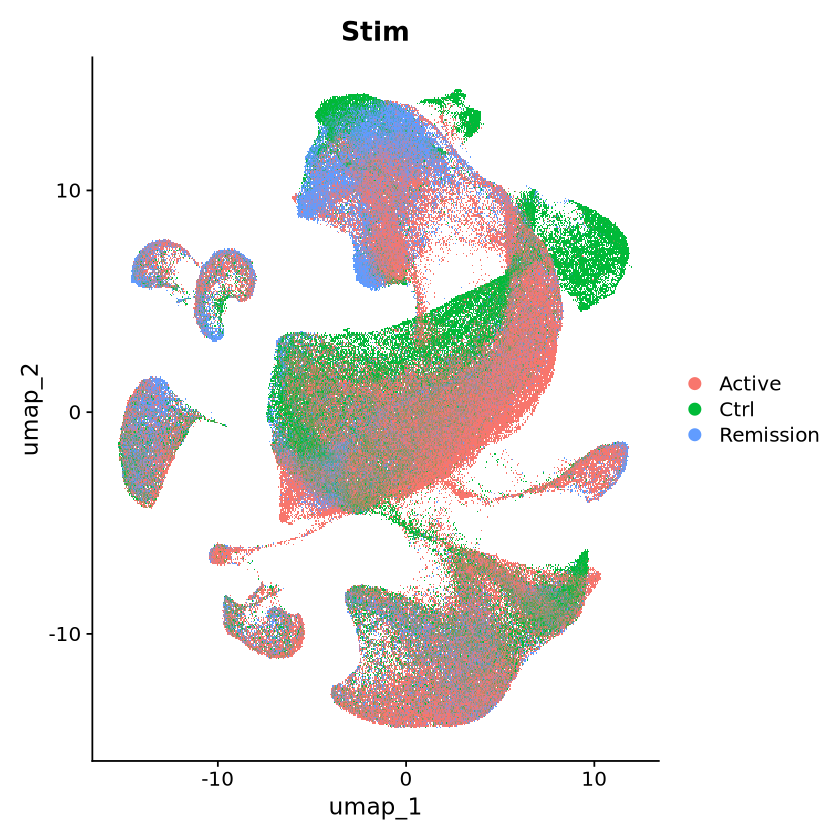

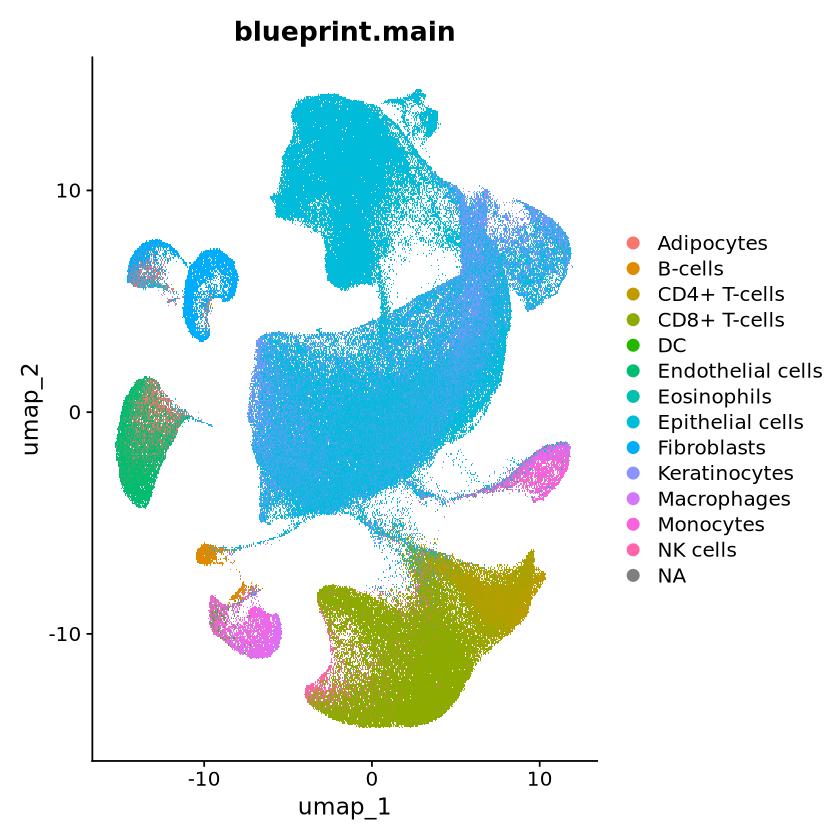

In [20]:
DimPlot(obj, group.by = "Stim")
DimPlot(obj, group.by = "blueprint.main")

In [21]:
seu =  obj
scConf = createConfig(seu)
makeShinyApp(seu, scConf,
             gene.mapping = TRUE,
             shiny.title = "Eosinophilic esophagitis (EoE) esophagus scRNAseq (SCP1242)",
             shiny.dir = "eoe_esophagitis_scRNAseq_SCP1242/",
             gex.assay = "SCT",
             default.multigene = c('LILRB1', 'PDCD1')) 
system("R -e \"shiny::runApp('eoe_esophagitis_scRNAseq_SCP1242')\"")

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.3 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.3 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.3 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.3 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.3 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.3 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.3 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.3 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.3 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.3 GiB”
Warning message in asMethod(ob